## Alaska Berry Futures
### Temperature change over time

February 23, 2023    
Using ACRC temperature data to investigate freeze thaw days in selected locations across Alaska    
https://akclimate.org/data/data-portal/    
    
Lingonberry Threat - "Spring icing: In a study in Sweden, when winter warming melted snow but then froze again to cover the plants
in ice for weeks or months two winters in a row there was a significant decrease in the number of flowers." - can we apply to Alaska?

In [26]:
## TO DO download csv with snow depth as well 

In [27]:
import pandas as pd
import os
import numpy as np

In [30]:
working_directory = os.getcwd()

anchorage = pd.read_csv(working_directory + "\\acrc_USW00026451_daily_anchorage_temp-snow.csv", skiprows=4)
bethel =  pd.read_csv(working_directory + "\\acrc_USW00026615_daily_Bethel_temp-snow.csv", skiprows=4)
coldbay = pd.read_csv(working_directory + "\\acrc_USW00025624_daily_coldbay_temp-snow.csv", skiprows=4)
fairbanks = pd.read_csv(working_directory + "\\acrc_USW00026411_daily_fairbanks_temp-snow.csv", skiprows=4)
ketchikan = pd.read_csv(working_directory + "\\acrc_USW00025325_daily_ketchikan_temp-snow.csv", skiprows=4)
kotzebue = pd.read_csv(working_directory + "\\acrc_USW00026616_daily_kotzebue_temp-snow.csv", skiprows=4)
nome = pd.read_csv(working_directory + "\\acrc_USW00026617_daily_nome_temp-snow.csv", skiprows=4)
#northpole = pd.read_csv(working_directory + "\\acrc_USC00506581_daily_northpole_temp-snow.csv", skiprows=4)
utqiagvik = pd.read_csv(working_directory + "\\acrc_USW00027502_daily_utqiagvik_temp-snow.csv",  skiprows=4)

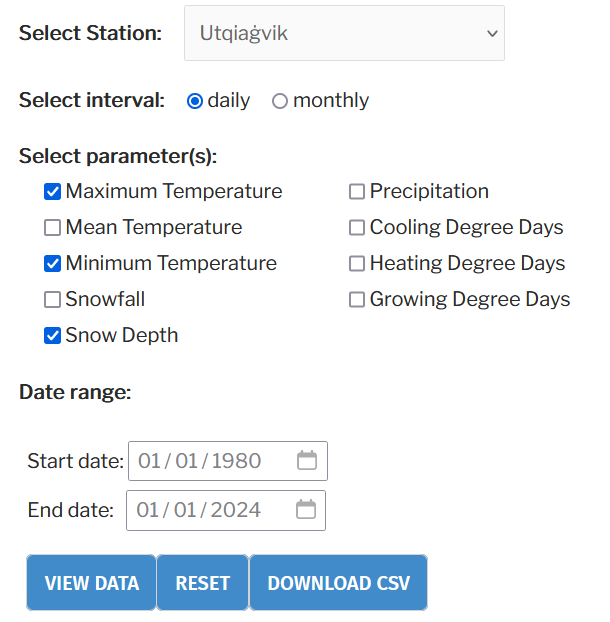


In [42]:
bethel.head()

,Date,Maximum Temperature (degF),Minimum Temperature (degF),Snow Depth (in),Winter_Year,Freeze_Thaw
0,1980-01-01,-11.0,-17.0,13.0,1980,False
1,1980-01-02,-10.0,-14.0,13.0,1980,False
2,1980-01-03,2.0,-14.0,12.0,1980,False
3,1980-01-04,32.0,-1.0,13.0,1980,False
4,1980-01-05,33.0,20.0,15.0,1980,True


In [33]:
# #count freeze thaw days per winter (Dec, Jan, Feb)

# def count_freeze_thaw_days(df):
#     # Convert the 'Date' column to datetime format if it's not already.
#     df['Date'] = pd.to_datetime(df['Date'])

#     # Define the winter year based on the month.
#     df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)

#     # Define a freeze-thaw day: Max Temp > 32 and Min Temp < 32.
#     df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)

#     # Filter the DataFrame for only December, January, and February.
#     winter_months = df[df['Date'].dt.month.isin([12, 1, 2])]

#     # Group by winter year and count freeze-thaw days.
#     freeze_thaw_counts = winter_months.groupby('Winter_Year')['Freeze_Thaw'].sum().reset_index()

#     # Rename the columns for clarity.
#     freeze_thaw_counts.rename(columns={'Freeze_Thaw': 'Freeze_Thaw_Days'}, inplace=True)

#     return freeze_thaw_counts


In [34]:
# def count_freeze_thaw_followed_by_cold(df):
#     # Convert 'Date' to datetime if not already done
#     df['Date'] = pd.to_datetime(df['Date'])

#     # Calculate the Winter Year
#     df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)

#     # Identify freeze-thaw days
#     df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)
    
#     # Initialize a list to hold the count for each winter year
#     winter_counts = []

#     for year in df['Winter_Year'].unique():
#         # Filter the DataFrame for the current winter year
#         winter_df = df[df['Winter_Year'] == year]

#         # Filter for December, January, and February of the winter year
#         winter_df = winter_df[winter_df['Date'].dt.month.isin([12, 1, 2])]

#         # Sort by date to ensure correct sequential processing
#         winter_df = winter_df.sort_values(by='Date')

#         # Initialize the count of freeze-thaw events followed by 3 weeks of cold
#         count = 0

#         for index, row in winter_df.iterrows():
#             if row['Freeze_Thaw']:
#                 # Get the date of the freeze-thaw event
#                 ft_date = row['Date']
#                 # Calculate the end date for the 3-week period
#                 end_date = ft_date + pd.Timedelta(days=21)
#                 # Select the next 21 days in the DataFrame
#                 subsequent_period = winter_df[(winter_df['Date'] > ft_date) & (winter_df['Date'] <= end_date)]

#                 # Check if all days in the subsequent period are below freezing
#                 if len(subsequent_period) == 21 and (subsequent_period['Minimum Temperature (degF)'] < 32).all():
#                     count += 1

#         # Add the count for the winter year to the list
#         winter_counts.append((year, count))

#     # Convert the list of tuples to a DataFrame
#     result_df = pd.DataFrame(winter_counts, columns=['Winter_Year', 'Freeze_Thaw_Followed_By_Cold_Count'])
#     return result_df


In [35]:

# def combined_freeze_thaw_counts(df, months, n_days_freezing):
#     """
#     This function analyzes a DataFrame containing daily maximum and minimum temperature readings. 
#     It identifies and counts two specific winter weather events for each winter year (defined as 
#     December of the current year to February of the following year): 
#     1) The number of freeze-thaw days, where the maximum temperature exceeds the freezing point 
#        (32 degrees Fahrenheit) and the minimum temperature is below freezing on the same day.
#     2) The number of freeze-thaw days that are immediately followed by a continuous three-week 
#        period of sub-freezing temperatures.

#     The function returns a DataFrame with columns for the winter year, the count of freeze-thaw days, 
#     and the count of freeze-thaw days followed by three weeks of consistent cold temperatures. 

#     Parameters:
#     - df (DataFrame): A pandas DataFrame with columns 'Date', 'Maximum Temperature (degF)', and 
#                       'Minimum Temperature (degF)'.
#     - months (list): which months to check. e.g., December, January, February = [12,1,2]
#     - n_days_freezing (integer): number of days of below freezing temps after a freeze-thaw day, e.g., 2 weeks =14
    
#     Returns:
#     - DataFrame: A pandas DataFrame with each row representing a winter year and columns for the 
#                  count of freeze-thaw days and the count of extended cold periods following 
#                  freeze-thaw days.
#     """

#     # Convert 'Date' to datetime if not already done
#     df['Date'] = pd.to_datetime(df['Date'])

#     # Calculate the Winter Year
#     df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)

#     # Identify freeze-thaw days
#     df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)
    
#     # Initialize a list to hold the combined results
#     combined_results = []

#     for year in df['Winter_Year'].unique():
#         # Filter the DataFrame for the current winter year
#         winter_df = df[df['Winter_Year'] == year]

#         # Filter for December, January, February, and March of the winter year
#         winter_months = winter_df[winter_df['Date'].dt.month.isin(months)]

#         # Sort by date to ensure correct sequential processing
#         winter_months_sorted = winter_months.sort_values(by='Date')

#         # Count freeze-thaw days
#         freeze_thaw_count = winter_months_sorted['Freeze_Thaw'].sum()

#         # Initialize the count of freeze-thaw events followed by 3 weeks of cold
#         cold_streak_count = 0

#         for index, row in winter_months_sorted.iterrows():
#             if row['Freeze_Thaw']:
#                 # Get the date of the freeze-thaw event
#                 ft_date = row['Date']
#                 # Calculate the end date for the 2-week period
#                 end_date = ft_date + pd.Timedelta(days=n_days_freezing)
#                 # Select the next 14 days in the DataFrame
#                 subsequent_period = winter_months_sorted[(winter_months_sorted['Date'] > ft_date) & (winter_months_sorted['Date'] <= end_date)]

#                 # Check if all days in the subsequent period are below freezing
#                 if len(subsequent_period) >= n_days_freezing and (subsequent_period['Maximum Temperature (degF)'] <= 32).all():
#                     cold_streak_count += 1
                    

#         # Add the combined result for the winter year to the list
#         combined_results.append({
#             'Winter_Year': year,
#             'Freeze_Thaw_Days': freeze_thaw_count,
#             'Freeze_Thaw_Followed_By_Cold_Count': cold_streak_count
#         })

#     # Convert the list of dictionaries to a DataFrame
#     result_df = pd.DataFrame(combined_results)
#     return result_df


In [48]:
def combined_freeze_thaw_counts_adjusted(df, months, n_days_freezing):
    """
    Adjusted function to analyze a DataFrame containing daily maximum and minimum temperature readings, 
    and snow depth. It identifies and counts:
    1) The number of freeze-thaw days, where the maximum temperature exceeds the freezing point 
       (32 degrees Fahrenheit) and the minimum temperature is below freezing on the same day.
    2) The number of freeze-thaw days that are immediately followed by a continuous period of 
       sub-freezing temperatures.
    3) The number of freeze-thaw days with less than 3 inches of snow followed by a cold streak as defined 
       by the continuous period of sub-freezing temperatures.

    Parameters:
    - df (DataFrame): A pandas DataFrame with columns 'Date', 'Maximum Temperature (degF)', 
                      'Minimum Temperature (degF)', and 'Snow Depth (in)'.
    - months (list): Months to check, e.g., December, January, February = [12,1,2]
    - n_days_freezing (integer): Number of days of below freezing temperatures after a freeze-thaw day, 
                                 e.g., 3 weeks = 21 days
    
    Returns:
    - DataFrame: A pandas DataFrame with each row representing a winter year and columns for the 
                 count of freeze-thaw days, the count of extended cold periods following freeze-thaw days, 
                 and the count of freeze-thaw days with low snow followed by a cold streak.
    """
    df['Date'] = pd.to_datetime(df['Date'])
    df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)
    df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)
    
    combined_results = []

    for year in df['Winter_Year'].unique():
        winter_df = df[df['Winter_Year'] == year]
        winter_months = winter_df[winter_df['Date'].dt.month.isin(months)]
        winter_months_sorted = winter_months.sort_values(by='Date')

        freeze_thaw_count = winter_months_sorted['Freeze_Thaw'].sum()
        cold_streak_count = 0
        freeze_thaw_streak_low_snow = 0  # Initialize counter for freeze-thaw days with low snow followed by cold streak

        for index, row in winter_months_sorted.iterrows():
            if row['Freeze_Thaw']:
                ft_date = row['Date']
                end_date = ft_date + pd.Timedelta(days=n_days_freezing)
                subsequent_period = winter_months_sorted[(winter_months_sorted['Date'] > ft_date) & (winter_months_sorted['Date'] <= end_date)]

                if len(subsequent_period) >= n_days_freezing and (subsequent_period['Maximum Temperature (degF)'] <= 32).all():
                    cold_streak_count += 1
                    # Check for snow depth less than 3 inches on the freeze-thaw day
                    if row['Snow Depth (in)'] < 3:
                        freeze_thaw_streak_low_snow += 1

        combined_results.append({
            'Winter_Year': year,
            'Freeze_Thaw_Days': freeze_thaw_count,
            'Freeze_Thaw_with_Cold_Period': cold_streak_count,
            'Freeze_Thaw_Low_Snow_Cold_Period': freeze_thaw_streak_low_snow  # Add the new count to the results
        })

    result_df = pd.DataFrame(combined_results)
    return result_df


In [45]:
def apply_combined_freeze_thaw_counts_to_list(df_list, months, n_days_freezing):
    """
    Applies the combined_freeze_thaw_counts function to a list of named DataFrames and returns a 
    single DataFrame. The result includes columns for each input DataFrame, with the column names 
    prefixed by the name of the original DataFrame for identification.
    
    Parameters:
    - df_list (list of tuples): A list where each element is a tuple with the first element being 
                                a string representing the name of the DataFrame and the second 
                                element being the DataFrame itself.
                                
    Returns:
    - DataFrame: A single pandas DataFrame containing the results from each DataFrame in df_list, 
                 with columns named according to the name provided for each DataFrame.
    """
    
    # Initialize an empty list to store the resulting DataFrames
    results = []
    
    # Iterate over the list of DataFrames
    for name, df in df_list:
        # Apply the combined_freeze_thaw_counts function to each DataFrame
        result_df = combined_freeze_thaw_counts_adjusted(df, months, n_days_freezing)
        
        # Prefix the column names with the name of the DataFrame
        result_df.columns = [f"{name}_{col}" for col in result_df.columns]
        
        # Append the result to the list
        results.append(result_df)
    
    # Concatenate all the result DataFrames horizontally
    combined_results = pd.concat(results, axis=1)
    
    return combined_results

# Example usage:
# Assuming you have a list of tuples with names and DataFrames
# df_list = [('df1', dataframe1), ('df2', dataframe2), ...]
# combined_df = apply_combined_freeze_thaw_counts_to_list(df_list)
# print(combined_df)

In [37]:
ak_towns = [('bethel', bethel), ('coldbay', coldbay), 
            ('anchorage', anchorage), ('ketchikan', ketchikan),
            ('kotzebue', kotzebue), ('nome', nome),
            ('fairbanks', fairbanks), ('utqiagvik', utqiagvik)
            ]

In [49]:
winter_df = apply_combined_freeze_thaw_counts_to_list(ak_towns, [12,1,2,3], 14)

In [50]:
winter_df

,bethel_Winter_Year,bethel_Freeze_Thaw_Days,bethel_Freeze_Thaw_with_Cold_Period,bethel_Freeze_Thaw_Low_Snow_Cold_Period,coldbay_Winter_Year,coldbay_Freeze_Thaw_Days,coldbay_Freeze_Thaw_with_Cold_Period,coldbay_Freeze_Thaw_Low_Snow_Cold_Period,anchorage_Winter_Year,anchorage_Freeze_Thaw_Days,...,nome_Freeze_Thaw_with_Cold_Period,nome_Freeze_Thaw_Low_Snow_Cold_Period,fairbanks_Winter_Year,fairbanks_Freeze_Thaw_Days,fairbanks_Freeze_Thaw_with_Cold_Period,fairbanks_Freeze_Thaw_Low_Snow_Cold_Period,utqiagvik_Winter_Year,utqiagvik_Freeze_Thaw_Days,utqiagvik_Freeze_Thaw_with_Cold_Period,utqiagvik_Freeze_Thaw_Low_Snow_Cold_Period
0,1980,26,2,0,1980,24,0,0,1980,36,...,1,0,1980,26,0,0,1980,0,0,0
1,1981,45,3,2,1981,44,0,0,1981,58,...,3,0,1981,46,1,0,1981,0,0,0
2,1982,25,2,1,1982,44,0,0,1982,16,...,2,0,1982,10,2,0,1982,3,1,0
3,1983,21,3,1,1983,50,1,1,1983,36,...,2,0,1983,12,1,0,1983,0,0,0
4,1984,26,2,2,1984,35,1,0,1984,34,...,1,0,1984,18,1,0,1984,0,0,0
5,1985,29,1,0,1985,44,0,0,1985,52,...,2,0,1985,16,2,0,1985,0,0,0
6,1986,29,1,1,1986,35,0,0,1986,42,...,3,2,1986,14,3,0,1986,0,0,0
7,1987,42,2,0,1987,53,0,0,1987,49,...,3,2,1987,20,1,0,1987,0,0,0
8,1988,21,2,1,1988,47,0,0,1988,44,...,2,0,1988,17,2,0,1988,0,0,0
9,1989,29,1,0,1989,52,0,0,1989,37,...,2,0,1989,11,2,0,1989,0,0,0


In [51]:
autumn_df = apply_combined_freeze_thaw_counts_to_list(ak_towns, [10,11], 14)

In [52]:
autumn_df

,bethel_Winter_Year,bethel_Freeze_Thaw_Days,bethel_Freeze_Thaw_with_Cold_Period,bethel_Freeze_Thaw_Low_Snow_Cold_Period,coldbay_Winter_Year,coldbay_Freeze_Thaw_Days,coldbay_Freeze_Thaw_with_Cold_Period,coldbay_Freeze_Thaw_Low_Snow_Cold_Period,anchorage_Winter_Year,anchorage_Freeze_Thaw_Days,...,nome_Freeze_Thaw_with_Cold_Period,nome_Freeze_Thaw_Low_Snow_Cold_Period,fairbanks_Winter_Year,fairbanks_Freeze_Thaw_Days,fairbanks_Freeze_Thaw_with_Cold_Period,fairbanks_Freeze_Thaw_Low_Snow_Cold_Period,utqiagvik_Winter_Year,utqiagvik_Freeze_Thaw_Days,utqiagvik_Freeze_Thaw_with_Cold_Period,utqiagvik_Freeze_Thaw_Low_Snow_Cold_Period
0,1980,25,1,0,1980,20,0,0,1980,29,...,1,0,1980,18,1,1,1980,0,0,0
1,1981,24,0,0,1981,17,0,0,1981,23,...,1,0,1981,16,2,1,1981,0,0,0
2,1982,18,0,0,1982,25,0,0,1982,18,...,1,0,1982,12,2,0,1982,2,1,0
3,1983,14,1,1,1983,19,0,0,1983,31,...,1,1,1983,13,2,0,1983,3,1,1
4,1984,17,1,1,1984,9,0,0,1984,23,...,1,0,1984,13,1,0,1984,2,1,0
5,1985,15,1,0,1985,14,0,0,1985,13,...,1,1,1985,8,1,1,1985,3,1,1
6,1986,18,1,1,1986,11,0,0,1986,22,...,1,0,1986,14,1,1,1986,0,0,0
7,1987,17,1,1,1987,19,0,0,1987,16,...,1,0,1987,18,1,1,1987,1,1,1
8,1988,15,1,1,1988,21,0,0,1988,22,...,1,0,1988,3,1,1,1988,0,0,0
9,1989,18,1,0,1989,15,0,0,1989,16,...,1,1,1989,10,1,0,1989,5,1,0


In [44]:
combined_freeze_thaw_counts_adjusted(bethel, [12,1,2], 21)

,Winter_Year,Freeze_Thaw_Days,Freeze_Thaw_Followed_By_Cold_Count,Freeze_Thaw_Streak_Low_Snow
0,1980,10,0,0
1,1981,22,1,0
2,1982,14,0,0
3,1983,11,2,0
4,1984,9,1,1
5,1985,23,1,0
6,1986,23,0,0
7,1987,27,0,0
8,1988,20,0,0
9,1989,25,0,0
